Let's first calculate variables used in the calculations. (Note the charge is not assigned a number because the angular distributions are not effected by the value.)

Left-handed and right-handed coupling of quarks to Z boson is
$$ g^{Z\rightarrow q \bar{q}} = \frac{| e | (T_3 - Q \sin^{2} \theta_{W})}{\sin \theta_{W} \cos \theta_{W}}$$,
where 

$T_3=0$ for right-handed quarks, $T_3=1/2$ for left-handed up quark, $T_3=-1/2$ for left-handed down, 

$Q=2/3$ for up quark, $Q=-1/3$ for down quark,

$\cos \theta_W=\frac{m_W}{m_Z}$, $\sin^2 \theta_W=1-(m_W/m_Z)^2$ (Weinberg mixing angle),

Let's use the mass of Z and W values that are listed in PDG.

In [1]:
mZ= 91.1876

91.1876

In [2]:
mW = 80.379

80.379

In [3]:
cosW = mW/mZ

0.881469

In [4]:
sinW = Sqrt[1-cosW^2]

0.472243

In [5]:
gZddLeft = charge * (-0.5+(1/3)*sinW^2) / sinW / cosW 

-1.02257 charge

In [6]:
gZddRight = charge * (1/3*sinW^2) / sinW / cosW

0.178582 charge

Left-handed and right-handed coupling of leptons to Z boson is
$$ g^{Z\rightarrow \ell \bar{\ell}} = \frac{| e | (T_3 + \sin^2 \theta_W)}{\sin \theta_W \cos \theta_W}$$
where 

$T_3=0$ for right-handed leptons, $T_3=-1/2$ for left-handed leptons,


$\cos \theta_W=\frac{m_W}{m_Z}$, $\sin^2 \theta_W=1-(m_W/m_Z)^2$ (Weinberg mixing angle),

In [7]:
gZllLeft = charge * (-0.5+sinW^2) / sinW / cosW

-0.665406 charge

In [8]:
gZllRight = charge * sinW^2 / sinW / cosW

0.535745 charge

For $Z \gamma$, the production angular distribution is
$$ \frac{1}{N}\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} = (g^{2}_{\text{rh lep}}+g^{2}_{\text{lh lep}})(g^{2}_{\text{rh qua}}+g^{2}_{\text{lh qua}})\mathcal{G}_1)+(g^{2}_{\text{rh lep}}-g^{2}_{\text{lh lep}})(g^{2}_{\text{rh qua}}-g^{2}_{\text{rh qua}})\mathcal{G}_2$$

$$ \mathcal{G}_1 = [ (m_{\ell\ell}^{4} + \hat{s}^2) (3+\cos2\theta) (4\csc^2\Theta -2 ) + 8 m_{\ell\ell}^2 \hat{s} \sin^2\theta (2+\cos2\phi) + 8 m_{\ell\ell}\sqrt{\hat{s}}(m^2_{\ell\ell}+\hat{s})\cot\Theta\sin2\theta\cos\phi ]$$

$$ \mathcal{G}_2 = 16 \csc\Theta [(m^4_{\ell\ell} + \hat{s}^2) \cos\theta \cot \Theta + m_{\ell\ell}\sqrt{\hat{s}} (m^2_{\ell\ell} + \hat{s}) \sin \theta \cos \phi ] $$

Let's set $\sqrt{\hat{s}}$ to 125 GeV.

In [9]:
s=125^2

15625

In [10]:
G1 = (mZ^4+s^2)*(3+Cos[2*th])*(4*Csc[lTh]^2-2) + 8*mZ^2*s*Sin[th]^2*(2+Cos[2*ph]) + 8*mZ*Sqrt[s]*(mZ^2+s)*Cot[lTh]*Sin[2*th]*Cos[ph]

8                                 2             9                        2
3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 
 
              9
>   2.18305 10  Cos[ph] Cot[lTh] Sin[2 th]

In [11]:
G2 = 16 * Csc[lTh] * ( (mZ^4+s^2)*Cos[th]*Cot[lTh] + mZ*Sqrt[s]*(mZ^2+s)*Sin[th]*Cos[ph] )

8                              8
16 Csc[lTh] (3.13283 10  Cos[th] Cot[lTh] + 2.72881 10  Cos[ph] Sin[th])

4                     8                              8
2.52616 charge  Csc[lTh] (3.13283 10  Cos[th] Cot[lTh] + 2.72881 10  Cos[ph] Sin[th]) + 
 
                   4            8                                 2
>   0.786377 charge  (3.13283 10  (3 + Cos[2 th]) (-2 + 4 Csc[lTh] ) + 
 
                9                        2             9
>      1.0394 10  (2 + Cos[2 ph]) Sin[th]  + 2.18305 10  Cos[ph] Cot[lTh] Sin[2 th])
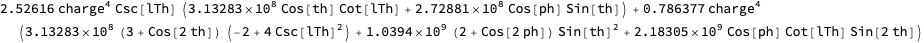

In [12]:
diffS = (gZllRight^2 + gZllLeft^2)*(gZddRight^2+gZddLeft^2)*G1+(gZllRight^2 - gZllLeft^2)*(gZddRight^2-gZddLeft^2)*G2

Let's convert $\theta$ to $\cos \theta$ and $\Theta$ to $\cos \Theta$ to do the integration.

8
              4  3.13283 10  clTh Cos[th]             8
2.52616 charge  (------------------------ + 2.72881 10  Cos[ph] Sin[th])
                                  2
                     Sqrt[1 - clTh ]
------------------------------------------------------------------------ + 
                                         2
                            Sqrt[1 - clTh ]
 
                   4            8           4
>   0.786377 charge  (3.13283 10  (-2 + ---------) (3 + Cos[2 th]) + 
                                                2
                                        1 - clTh
 
                                                       9
                9                        2   2.18305 10  clTh Cos[ph] Sin[2 th]
>      1.0394 10  (2 + Cos[2 ph]) Sin[th]  + ----------------------------------)
                                                                   2
                                                      Sqrt[1 - clTh ]
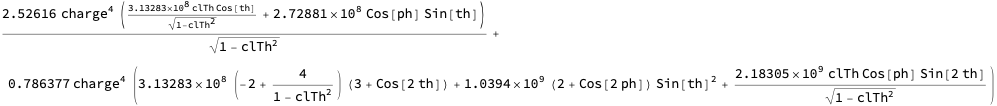

In [13]:
diffSOnclTh = diffS /. lTh -> ArcCos[clTh]

8
              4  3.13283 10  clTh cth             8             2
2.52616 charge  (-------------------- + 2.72881 10  Sqrt[1 - cth ] Cos[ph])
                                2
                   Sqrt[1 - clTh ]
--------------------------------------------------------------------------- + 
                                           2
                              Sqrt[1 - clTh ]
 
                   4           9         2
>   0.786377 charge  (1.0394 10  (1 - cth ) (2 + Cos[2 ph]) + 
 
                 8           4
>      3.13283 10  (-2 + ---------) (3 + Cos[2 ArcCos[cth]]) + 
                                 2
                         1 - clTh
 
                 9
       2.18305 10  clTh Cos[ph] Sin[2 ArcCos[cth]]
>      -------------------------------------------)
                                  2
                     Sqrt[1 - clTh ]
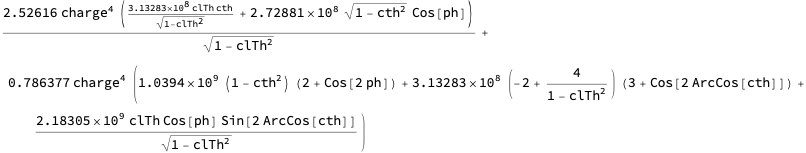

In [14]:
diffSOnclThcth =  diffSOnclTh /. th -> ArcCos[cth]

To remove the singularity, we can apply a $p_{T}^{\gamma}= 1 \text{ GeV}$ cut which corresponds to a $\cos \Theta$ cut according to the following equaiton.
$$\cos \Theta = \sqrt{1-4 (p_{T}^{\gamma})^{2}\hat{s}/(\hat{s}-m_{Z}^{2})^{2}}$$

In [15]:
cThCut = Sqrt[1-4*1^2*s/(s-mZ^2)^2]

0.999415

Let's integrate $$\int^{-1}_{1}{\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi}} d \cos \theta.$$

9       4                          2                        2
(1.08981 10  charge  (-4.41127 - 0.411265 clTh  - 0.99358 Sqrt[1 - clTh ] Cos[ph] + 
 
                      2                           2
>       (-1. + 1. clTh ) Cos[2 ph])) / (-1. + clTh )
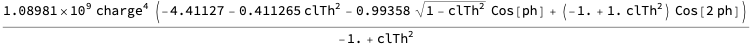

In [16]:
intcth = Integrate[diffSOnclThcth,{cth,-1,1}]

Let's integrate
$$\int^{\cos \Theta_{\text{cut}}}_{-\cos \Theta_{\text{cut}}} {\int^{-1}_{1}{\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} d \cos \theta} d \cos \Theta}$$
to get the $\phi$ distribution

In [17]:
intcthclTh = Integrate[intcth, {clTh,-cThCut,cThCut}]

9       4
3.32768 10  charge  (12.5817 + 1. Cos[ph] + 0.654614 Cos[2. ph])

Let's plot the $\phi$ distribution and normalize it.

-Graphics-
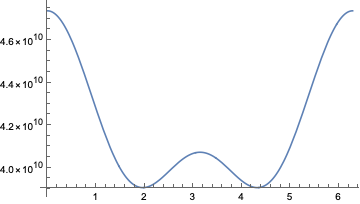

In [18]:
Plot[intcthclTh /. charge -> 1, {ph,0,2*Pi}]

Piecewise[{{0.0126497 (12.5817 + 1. Cos[ph] + 0.654614 Cos[2. ph]), 0 < ph < 2 Pi}}]
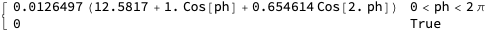

In [19]:
intcthclThNorm=PDF[ProbabilityDistribution[intcthclTh /. charge->1 ,{ph,0,2*Pi}, Method->"Normalize"],ph]

-Graphics-
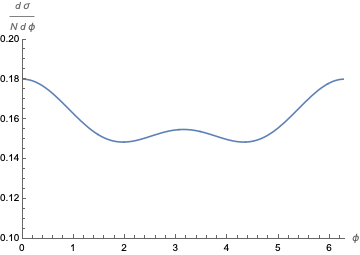

In [20]:
Plot[intcthclThNorm,{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}]

Let's integrate
$$\int^{2\pi}_{0} {\int^{-1}_{1}{\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} d \cos \theta} d \phi}$$
to get the $\cos \Theta$ distribution.

9       4                   2
-2.81613 10  charge  (10.7261 + 1. clTh )
-----------------------------------------
                         2
               -1. + clTh
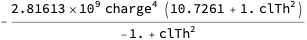

In [21]:
intcthph = Integrate[intcth, {ph,0,2*Pi}]

Let's plot the $\cos \Theta$ distribution and normalize it within the range of $-\cos \Theta_{\text{cut}}$ to $\cos \Theta_{\text{cut}}$

-Graphics-
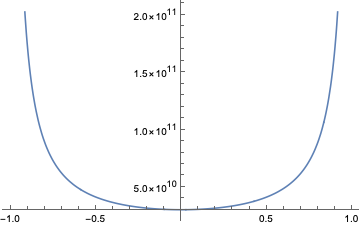

In [22]:
Plot[intcthph /. charge -> 1, {clTh,-cThCut,cThCut}]

2
            -0.0107051 (10.7261 + 1. clTh )
Piecewise[{{-------------------------------, -0.999415 < clTh < 0.999415}}]
                                2
                      -1. + clTh
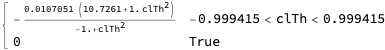

In [23]:
intcthphNorm=PDF[ProbabilityDistribution[intcthph /. charge->1 ,{clTh, -cThCut,cThCut}, Method->"Normalize"],clTh]

-Graphics-
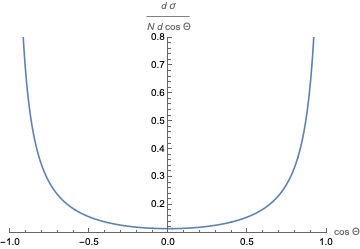

In [24]:
Plot[intcthphNorm,{clTh,-1,1}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos \\Theta", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\cos \\Theta)", TeXForm, HoldForm]}]

Let's integrate $$\int^{2\pi}_{0}{\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi}} d \phi.$$

4             10             9                      9    2
(charge  (-1.64629 10   - 4.97253 10  clTh cth + 4.07956 10  cth  + 
 
            2            9             10    2                 2
>       clTh  (4.07956 10  - 1.64629 10   cth ))) / (-1. + clTh )
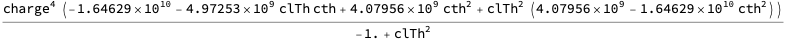

In [25]:
intph = Integrate[diffSOnclThcth,{ph,0,2*Pi}]

Let's integrate
$$\int^{\cos \Theta_{\text{cut}}}_{-\cos \Theta_{\text{cut}}} {\int^{2\pi}_{0}{\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} d \phi} d \cos \Theta}$$
to get the $\cos \theta$ distribution.

In [26]:
intphclTh = Integrate[intph, {clTh,-cThCut,cThCut}]

4            11                             10    2
charge  (1.08914 10   - 0.0849552 cth + 6.78533 10   cth )

Let's plot the $\cos \theta$ distribution and normalize it

-Graphics-
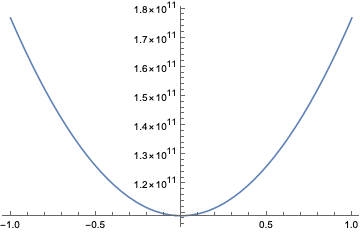

In [27]:
Plot[intphclTh /. charge -> 1, {cth,-1,1}]

-12            11                             10    2
Piecewise[{{3.80136 10    (1.08914 10   - 0.0849552 cth + 6.78533 10   cth ), 
 
>     -1 < cth < 1}}]
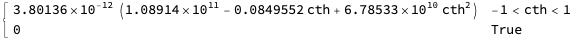

In [28]:
intphclThNorm=PDF[ProbabilityDistribution[intphclTh /. charge->1 ,{cth,-1,1}, Method->"Normalize"],cth]

-Graphics-
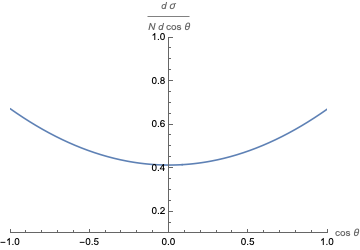

In [29]:
Plot[intphclThNorm,{cth,-1,1}, PlotRange->{{-1,1},{0.1,1}},AxesLabel->{ToExpression["\\cos \\theta", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\cos \\theta)", TeXForm, HoldForm]}]

For gluon fusion $H\rightarrow Z \gamma$, the production angular distribution is
$$ \frac{1}{N^\prime}\frac{d\sigma}{d\cos\Theta d\cos\theta d\phi} = 1 + \cos^2 \theta.$$

In [30]:
sigDiffS=1+Cos[th]^2

2
1 + Cos[th]

Let's make and plot angular distributions.

In [31]:
sigph=1/2/Pi

1
----
2 Pi

-Graphics-
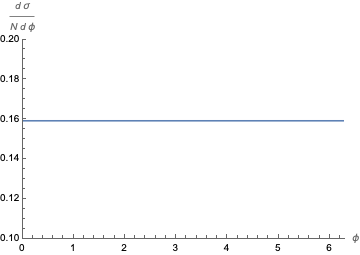

In [32]:
Plot[sigph,{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}]

In [33]:
sigclTh=(1/2/cThCut)

0.500293

-Graphics-
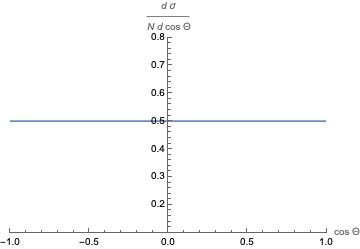

In [34]:
Plot[sigclTh, {clTh,-1,1}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\Theta)", TeXForm, HoldForm]}]

In [35]:
sigcth = sigDiffS /. th -> ArcCos[cth]

2
1 + cth

-Graphics-
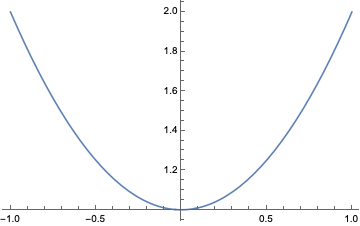

In [36]:
Plot[sigcth,{cth,-1,1}]

2
            3 (1 + cth )
Piecewise[{{------------, -1 < cth < 1}}]
                 8
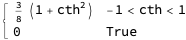

In [37]:
sigcthNorm=PDF[ProbabilityDistribution[sigcth,{cth,-1,1}, Method->"Normalize"],cth]

-Graphics-
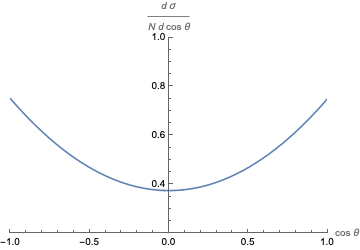

In [38]:
Plot[sigcthNorm, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}},AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\theta)", TeXForm, HoldForm]}]

Let's plot the $Z \gamma$ and gluon fusion $H\rightarrow Z \gamma$ angular distributions together.

-Graphics-
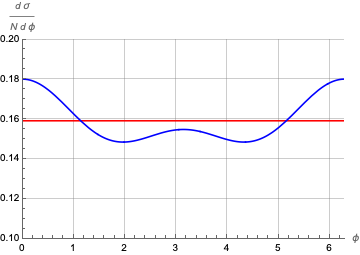

In [39]:
Plot[{sigph,intcthclThNorm},{ph,0,2*Pi}, PlotRange->{{0,2*Pi},{0.1,0.2}}, AxesLabel->{ToExpression["\\phi", TeXForm, HoldForm],ToExpression["d\\sigma / (Nd \\phi)", TeXForm, HoldForm]}, PlotStyle->{Red, Blue},GridLines->Automatic]

-Graphics-
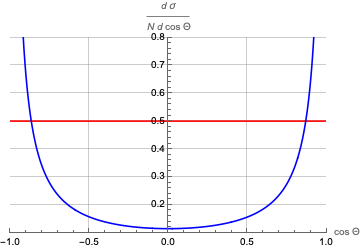

In [40]:
Plot[{sigclTh,intcthphNorm}, {clTh,-cThCut,cThCut}, PlotRange->{{-1,1},{0.1,0.8}},AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\Theta)", TeXForm, HoldForm]}, PlotStyle->{Red, Blue},GridLines->Automatic]

-Graphics-
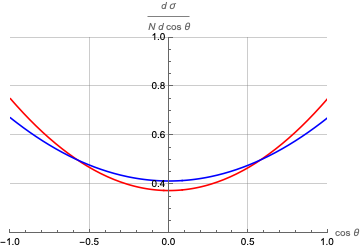

In [41]:
Plot[{sigcthNorm,intphclThNorm}, {cth,-1,1}, PlotRange->{{-1,1},{0.2,1.0}},AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["d\\sigma/(Nd\\cos\\theta)", TeXForm, HoldForm]},PlotStyle->{Red, Blue}, GridLines->Automatic]

Let's plot the 2D angular distributions for $Z \gamma$.

-Graphics3D-
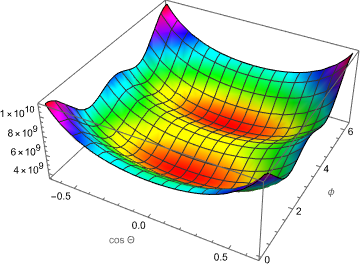

In [42]:
Plot3D[intcth /. charge->1,{clTh,-1+0.35,1-0.35},{ph,0,2*Pi},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["\\phi", TeXForm, HoldForm]}]

-Graphics3D-
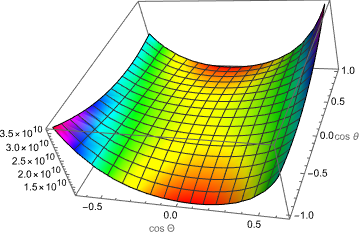

In [43]:
Plot3D[intph /. charge->1,{clTh,-1+0.35,1-0.35},{cth,-1,1},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["\\cos\\theta", TeXForm, HoldForm]}]

4            10                             10    2
charge  (1.73342 10   - 0.0135212 cth + 1.07992 10   cth  + 
 
                 9             9    2
>     (1.63376 10  - 1.63376 10  cth ) Cos[2. ph] + 
 
                               8                    2
>     Cos[ph] ((0. - 6.89341 10  I) Sqrt[1. - 1. cth ] 
 
                                                          2
>         (1. Log[(0.0684011 + 1.99883 I) Sqrt[1. - 1. cth ]] - 
 
                                                           2
>           1. Log[(0.0684011 - 1.99883 I) Sqrt[1. - 1. cth ]]) - 
 
>        0.00100311 Sin[2. ArcCos[cth]]))
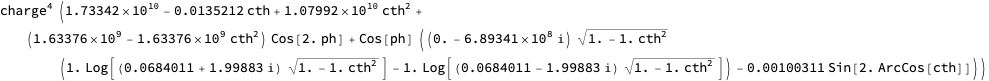

In [44]:
intclTh = Integrate[diffSOnclThcth, {clTh,-cThCut,cThCut}]

-Graphics3D-
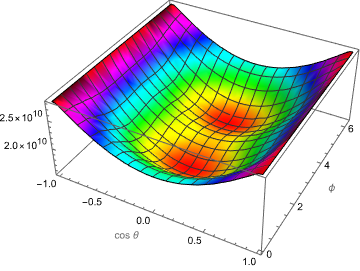

In [45]:
Plot3D[intclTh /. charge-> 1,{cth,-1,1},{ph,0,2*Pi},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["\\phi", TeXForm, HoldForm]}]

Let's plot the 2D angular distributions for gluon fusion $H\rightarrow Z \gamma$.

-Graphics3D-
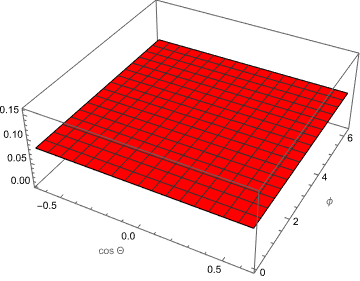

In [46]:
Plot3D[sigph*sigclTh,{clTh,-1+0.35,1-0.35},{ph,0,2*Pi},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["\\phi", TeXForm, HoldForm]}]

-Graphics3D-
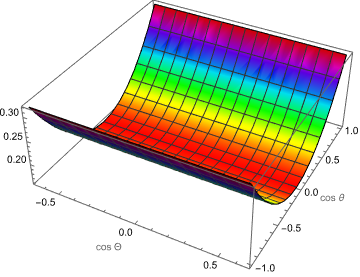

In [47]:
Plot3D[sigph*sigcth,{clTh,-1+0.35,1-0.35},{cth,-1,1},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\Theta", TeXForm, HoldForm],ToExpression["\\cos\\theta", TeXForm, HoldForm]}]

-Graphics3D-
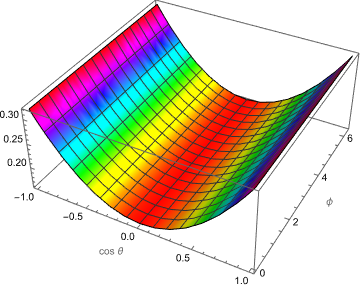

In [48]:
Plot3D[sigph*sigcth,{cth,-1,1},{ph,0,2*Pi},ColorFunction->Function[{x,y,z},Hue[z]],AxesLabel->{ToExpression["\\cos\\theta", TeXForm, HoldForm],ToExpression["\\phi", TeXForm, HoldForm]}]